<a href="https://colab.research.google.com/github/jonatasbx/Curso-CDIA/blob/main/tratamento_sus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Notebook para análise do banco de dados do SIH-SUS.

### Para a análise pretendida, a base foi filtrada com base na variável especialidade = 2 e raça/cor = preto

### De acordo com o historico de dados qual a previsão do custo de internação de uma pessoa preta na especialidade de obstreticia

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [54]:
pd.set_option('display.float_format', '{:.2f}'.format)
sih_sus = pd.read_excel('base_tratada_pretos.xlsx')

In [55]:
sih_sus.head()

,UF_ZI,ANO_CMPT,MES_CMPT,ESPEC,CGC_HOSP,CEP,MUNIC_RES,NASC,SEXO,DIAR_ACOM,QT_DIARIAS,PROC_SOLIC,PROC_REA,VAL_SH,VAL_TOT,VAL_UTI,US_TOT,DT_INTER,DT_SAIDA,DIAG_PRINC,DIAG_SECUN,COBRANCA,NATUREZA,NAT_JUR,GESTAO,RUBRICA,IND_VDRL,MUNIC_MOV,COD_IDADE,IDADE,DIAS_PERM,MORTE,NACIONAL,NUM_PROC,CAR_INT,HOMONIMO,NUM_FILHOS,INSTRU,CID_NOTIF,CONTRACEP1,CONTRACEP2,GESTRISCO,INSC_PN,SEQ_AIH5,CBOR,CNAER,VINCPREV,GESTOR_COD,GESTOR_TP,GESTOR_CPF,GESTOR_DT,CNES,CNPJ_MANT,INFEHOSP,CID_ASSO,CID_MORTE,COMPLEX,FINANC,FAEC_TP,REGCT,RACA_COR,ETNIA,SEQUENCIA,REMESSA,AUD_JUST,SIS_JUST,VAL_SH_FED,VAL_SP_FED,VAL_SH_GES,VAL_SP_GES,VAL_UCI
0,120000,2024,4,2,4034526000909.00,69934000,120025,20060201,3,1,1,310010039,310010039,276.60,555.90,0.00,106.08,20240421,20240422,O800,0,61,0,1023,2,0,1,120010,4,18,1,0,10,NaN,2,0,0,0,NaN,0,0,1,0,0,0,0,0,0,0,0,NaN,2001500,4034526000143.00,NaN,0,0,2,6,NaN,0,2,0,183,HE12000001N202404.DTS,NaN,NaN,0.00,0.00,0.00,0.00,0.00
1,120000,2024,4,2,4034526000909.00,69932000,120010,20041016,3,2,2,411010034,411010034,412.68,679.11,0.00,129.60,20240408,20240410,O821,0,61,0,1023,2,0,1,120010,4,19,2,0,10,NaN,2,0,0,0,NaN,0,0,1,0,0,0,0,0,0,0,0,NaN,2001500,4034526000143.00,NaN,0,0,2,6,NaN,0,2,0,190,HE12000001N202404.DTS,NaN,NaN,0.00,0.00,0.00,0.00,0.00
2,120000,2024,4,2,4034526000909.00,69932000,120010,19940809,3,0,3,411010034,411010034,396.68,663.11,0.00,126.54,20240331,20240403,O821,0,61,0,1023,2,0,1,120010,4,29,3,0,10,NaN,2,0,0,0,NaN,0,0,1,0,0,0,0,0,0,0,0,NaN,2001500,4034526000143.00,NaN,0,0,2,6,NaN,0,2,0,194,HE12000001N202404.DTS,NaN,NaN,0.00,0.00,0.00,0.00,0.00
3,270000,2024,4,2,NaN,57490000,270010,20020831,3,1,1,310010039,310010039,284.94,525.94,0.00,100.37,20240424,20240425,O800,0,61,0,1023,2,0,0,270240,4,21,1,0,10,NaN,2,0,0,0,NaN,0,0,1,0,0,0,0,0,0,0,0,NaN,806285,12200259000165.00,NaN,0,0,2,6,NaN,0,2,0,759,HE27000001N202404.DTS,NaN,NaN,0.00,0.00,0.00,0.00,0.00
4,270030,2024,4,2,24177305000131.00,57302205,270030,19870319,3,1,1,310010047,310010047,443.49,751.47,0.00,143.41,20240411,20240412,O800,0,61,0,3999,1,0,1,270030,4,37,1,0,10,NaN,2,0,0,0,NaN,0,0,1,0,0,0,0,0,0,0,0,NaN,2005050,NaN,NaN,0,0,2,6,NaN,0,2,0,212,HM27003001N202404.DTS,NaN,NaN,0.00,0.00,0.00,0.00,0.00


In [56]:
pd.options.display.max_columns = 113
sih_sus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8666 entries, 0 to 8665
Data columns (total 71 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   UF_ZI       8666 non-null   int64  
 1   ANO_CMPT    8666 non-null   int64  
 2   MES_CMPT    8666 non-null   int64  
 3   ESPEC       8666 non-null   int64  
 4   CGC_HOSP    5216 non-null   float64
 5   CEP         8666 non-null   int64  
 6   MUNIC_RES   8666 non-null   int64  
 7   NASC        8666 non-null   int64  
 8   SEXO        8666 non-null   int64  
 9   DIAR_ACOM   8666 non-null   int64  
 10  QT_DIARIAS  8666 non-null   int64  
 11  PROC_SOLIC  8666 non-null   int64  
 12  PROC_REA    8666 non-null   int64  
 13  VAL_SH      8666 non-null   float64
 14  VAL_TOT     8666 non-null   float64
 15  VAL_UTI     8666 non-null   float64
 16  US_TOT      8666 non-null   float64
 17  DT_INTER    8666 non-null   int64  
 18  DT_SAIDA    8666 non-null   int64  
 19  DIAG_PRINC  8666 non-null  

In [57]:
sih_sus_tratada = sih_sus.drop(['CGC_HOSP','CNPJ_MANT','AUD_JUST','SIS_JUST','FAEC_TP','GESTOR_DT','INFEHOSP','CID_NOTIF','NUM_PROC','DIAG_PRINC','REMESSA','CEP', 'MUNIC_RES','NASC','DIAR_ACOM','SEXO','PROC_SOLIC','VAL_UTI','VAL_SH','DT_INTER', 'DT_SAIDA','COBRANCA','RUBRICA','MUNIC_MOV',], axis=1)

In [58]:
sih_sus_tratada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8666 entries, 0 to 8665
Data columns (total 47 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   UF_ZI       8666 non-null   int64  
 1   ANO_CMPT    8666 non-null   int64  
 2   MES_CMPT    8666 non-null   int64  
 3   ESPEC       8666 non-null   int64  
 4   QT_DIARIAS  8666 non-null   int64  
 5   PROC_REA    8666 non-null   int64  
 6   VAL_TOT     8666 non-null   float64
 7   US_TOT      8666 non-null   float64
 8   DIAG_SECUN  8666 non-null   int64  
 9   NATUREZA    8666 non-null   int64  
 10  NAT_JUR     8666 non-null   int64  
 11  GESTAO      8666 non-null   int64  
 12  IND_VDRL    8666 non-null   int64  
 13  COD_IDADE   8666 non-null   int64  
 14  IDADE       8666 non-null   int64  
 15  DIAS_PERM   8666 non-null   int64  
 16  MORTE       8666 non-null   int64  
 17  NACIONAL    8666 non-null   int64  
 18  CAR_INT     8666 non-null   int64  
 19  HOMONIMO    8666 non-null  

### Todas as variáveis com valores nulos foram retirados assim, como as variáveis categoricas.

## Inicio da EDA

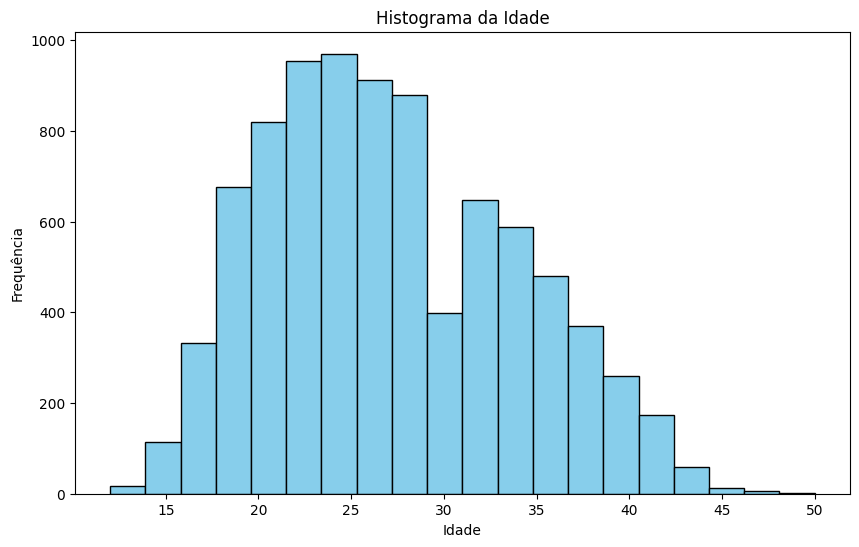

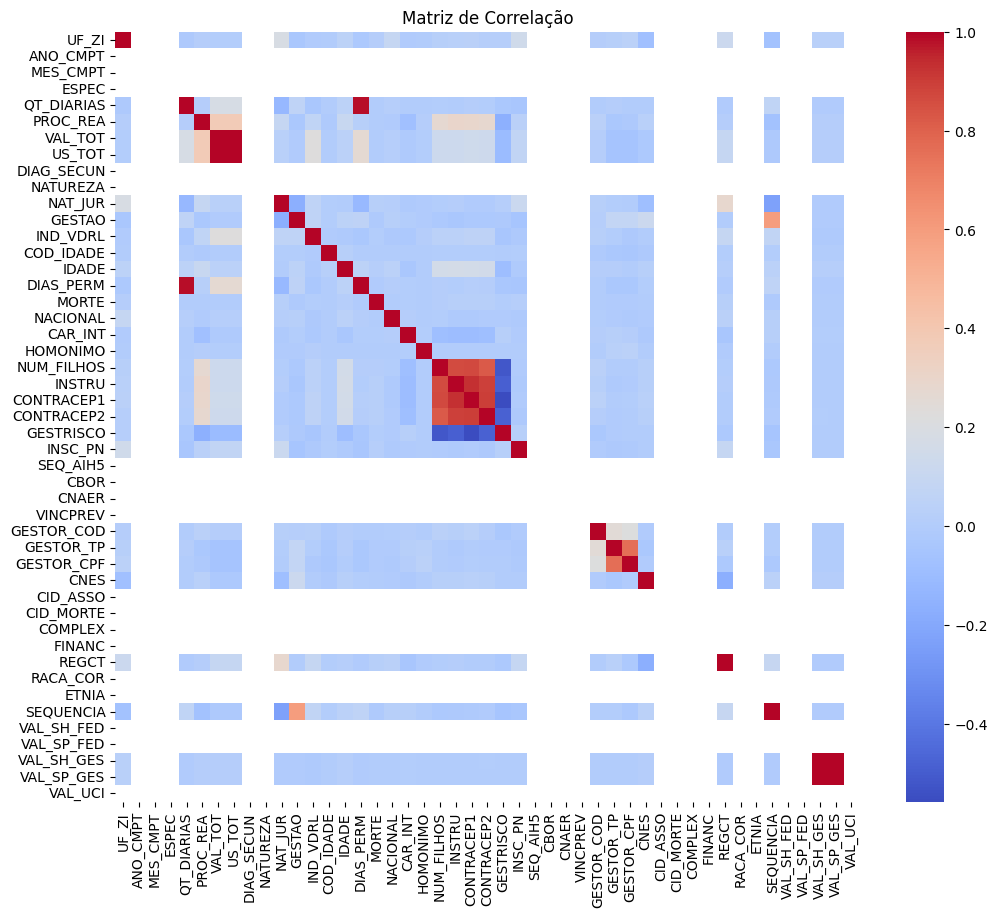

In [61]:
import seaborn as sns

# Assuming sih_sus_tratada is already defined as in the previous code

# Example 1: Histogram of 'IDADE'
plt.figure(figsize=(10, 6))
plt.hist(sih_sus_tratada['IDADE'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.title('Histograma da Idade')
plt.show()


# Example 2: Scatter plot of 'VAL_SH' vs 'IDADE'
#plt.figure(figsize=(10, 6))
#plt.scatter(sih_sus_tratada['IDADE'], sih_sus_tratada['VAL_SH'], alpha=0.5)
#plt.xlabel('Idade')
#plt.ylabel('Valor da Internação (VAL_SH)')
#plt.title('Valor da Internação vs Idade')
#plt.show()


# Example 4: Correlation matrix heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = sih_sus_tratada.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()
